In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'CLLMentalHealth.csv'  # Update this with your file's path
data = pd.read_csv(file_path)

In [3]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [4]:
# Extract month and year from the 'Timestamp' column
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

In [5]:
# Group by 'YearMonth' and calculate the sum of depressive entries
monthly_trend = data.groupby('YearMonth')['Depressive'].sum().reset_index()

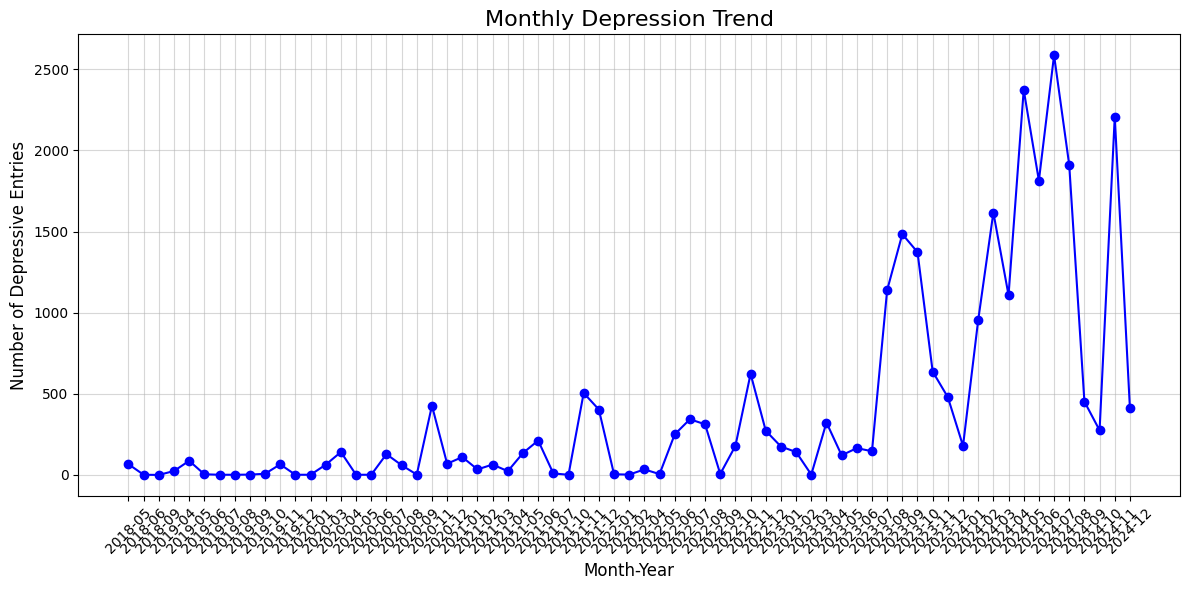

In [6]:
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['YearMonth'].astype(str), monthly_trend['Depressive'], marker='o', linestyle='-', color='b')
plt.title('Monthly Depression Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Depressive Entries', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Calculate the total number of depressive entries
total_depressive_entries = monthly_trend['Depressive'].sum()

print("Total number of depressive entries:", total_depressive_entries)

Total number of depressive entries: 26748


In [8]:
# Group by 'Username' and calculate the total number of depressive entries for each user
user_depression = data.groupby('Username')['Depressive'].agg(['sum', 'count'])

In [9]:
# Calculate the percentage of depressive entries for each user
user_depression['Depression_Percentage'] = (user_depression['sum'] / user_depression['count']) * 100

In [10]:
print(user_depression[['Depression_Percentage']])

                   Depression_Percentage
Username                                
--Ditty--Dragon--                  100.0
--Miranda--                        100.0
--Random_Editor--                  100.0
--V0X--                             75.0
--pew-pew--                        100.0
...                                  ...
zymeth34212                          0.0
zyxwvutsr321                         0.0
zyzyx_music                         75.0
zzr602                             100.0
zzwugz                             100.0

[20029 rows x 1 columns]


In [11]:
user_depression[['Depression_Percentage']].to_csv('user_depression_percentage.csv', index=True)

In [12]:
# Extract the year from the 'Timestamp' column
data['Year'] = data['Timestamp'].dt.year

In [13]:
# Group by 'Year' and calculate the sum of depressive entries for each year
yearly_trend = data.groupby('Year')['Depressive'].sum().reset_index()

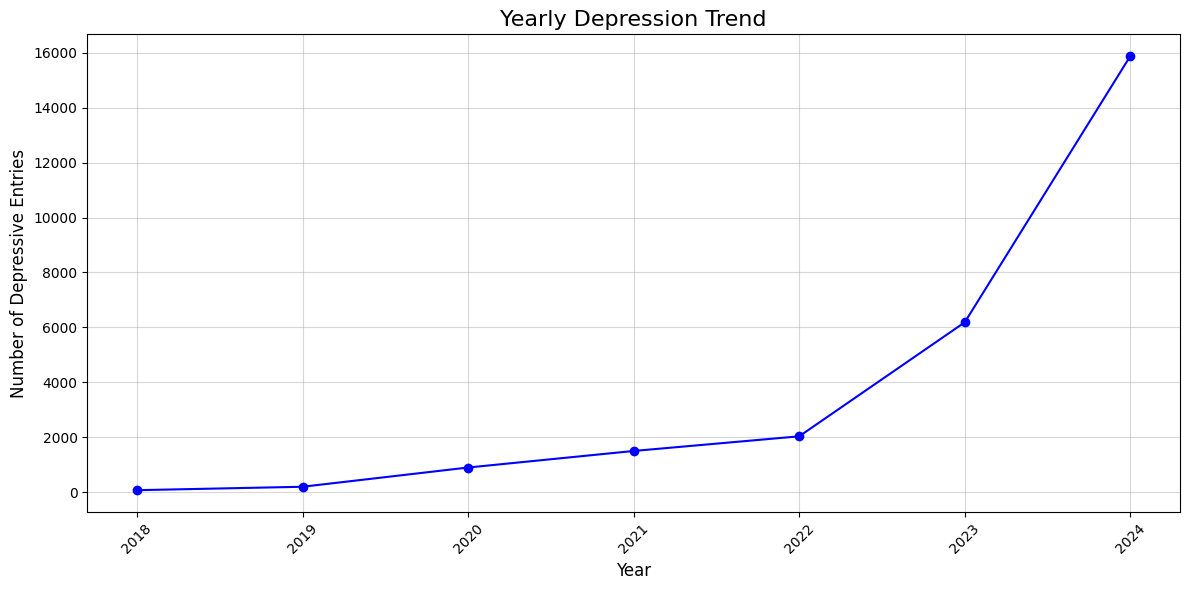

In [14]:
# Plotting the yearly trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend['Year'], yearly_trend['Depressive'], marker='o', linestyle='-', color='b')
plt.title('Yearly Depression Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Depressive Entries', fontsize=12)
plt.xticks(yearly_trend['Year'], rotation=45, fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:

# Load the uploaded dataset
file_path = 'user_depression_percentage.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


,Username,Depression_Percentage
0,--Ditty--Dragon--,100.0
1,--Miranda--,100.0
2,--Random_Editor--,100.0
3,--V0X--,75.0
4,--pew-pew--,100.0


In [16]:

# Define bins and categorize the Depression_Percentage
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
data['Range'] = pd.cut(data['Depression_Percentage'], bins=bins, labels=labels, right=False)

# Count the number of users in each range
range_counts = data['Range'].value_counts().sort_index()

# Calculate percentage of depressive and non-depressive users
depressive_users = (data['Depression_Percentage'] > 50).sum()
non_depressive_users = (data['Depression_Percentage'] <= 50).sum()
total_users = len(data)

depressive_percentage = (depressive_users / total_users) * 100
non_depressive_percentage = (non_depressive_users / total_users) * 100

# Print calculations
range_counts, depressive_percentage, non_depressive_percentage


(Range
 0-10      4721
 10-20       10
 20-30       70
 30-40      233
 40-50       66
 50-60     1279
 60-70      644
 70-80      338
 80-90      294
 90-100      37
 Name: count, dtype: int64,
 np.float64(68.41579709421339),
 np.float64(31.584202905786608))

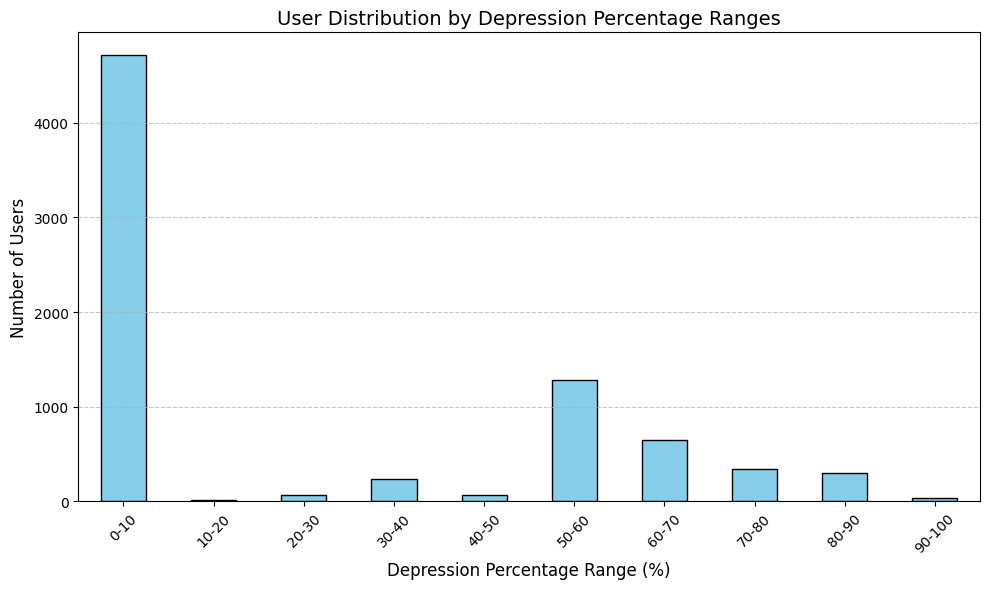

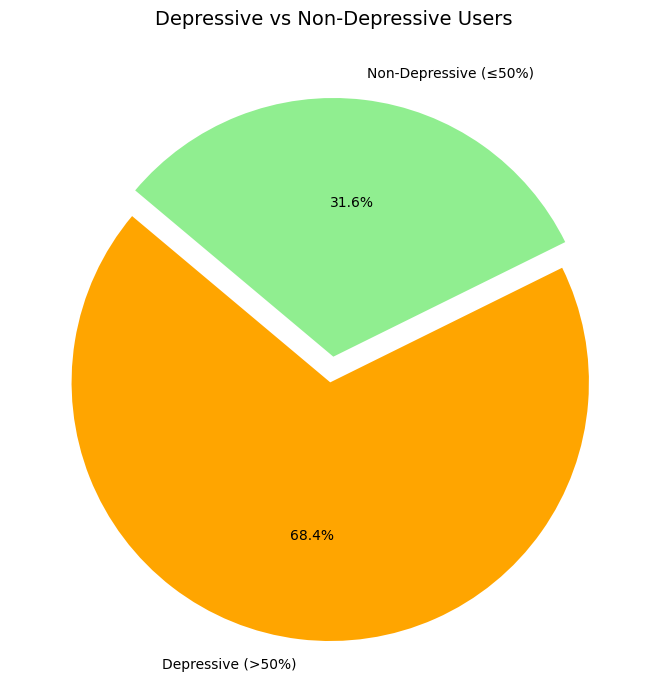

In [17]:
# Bar Chart: User Distribution by Depression Percentage Ranges
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('User Distribution by Depression Percentage Ranges', fontsize=14)
plt.xlabel('Depression Percentage Range (%)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart: Depressive vs Non-Depressive Users
labels = ['Depressive (>50%)', 'Non-Depressive (≤50%)']
sizes = [depressive_percentage, non_depressive_percentage]
colors = ['orange', 'lightgreen']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('Depressive vs Non-Depressive Users', fontsize=14)
plt.tight_layout()
plt.show()
